## n_components = 2 olarak ayarlayarak kalp hastalığı verilerine GMM uygulayın. Çözümünüz için ARI ve siluet skorlarına bakın ve önceki derslerde k-means ve hiyerarşik kümeleme çözümleriyle karşılaştırın. Hangi algoritma daha iyi performans gösteriyor?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.mixture import GaussianMixture

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [3]:
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

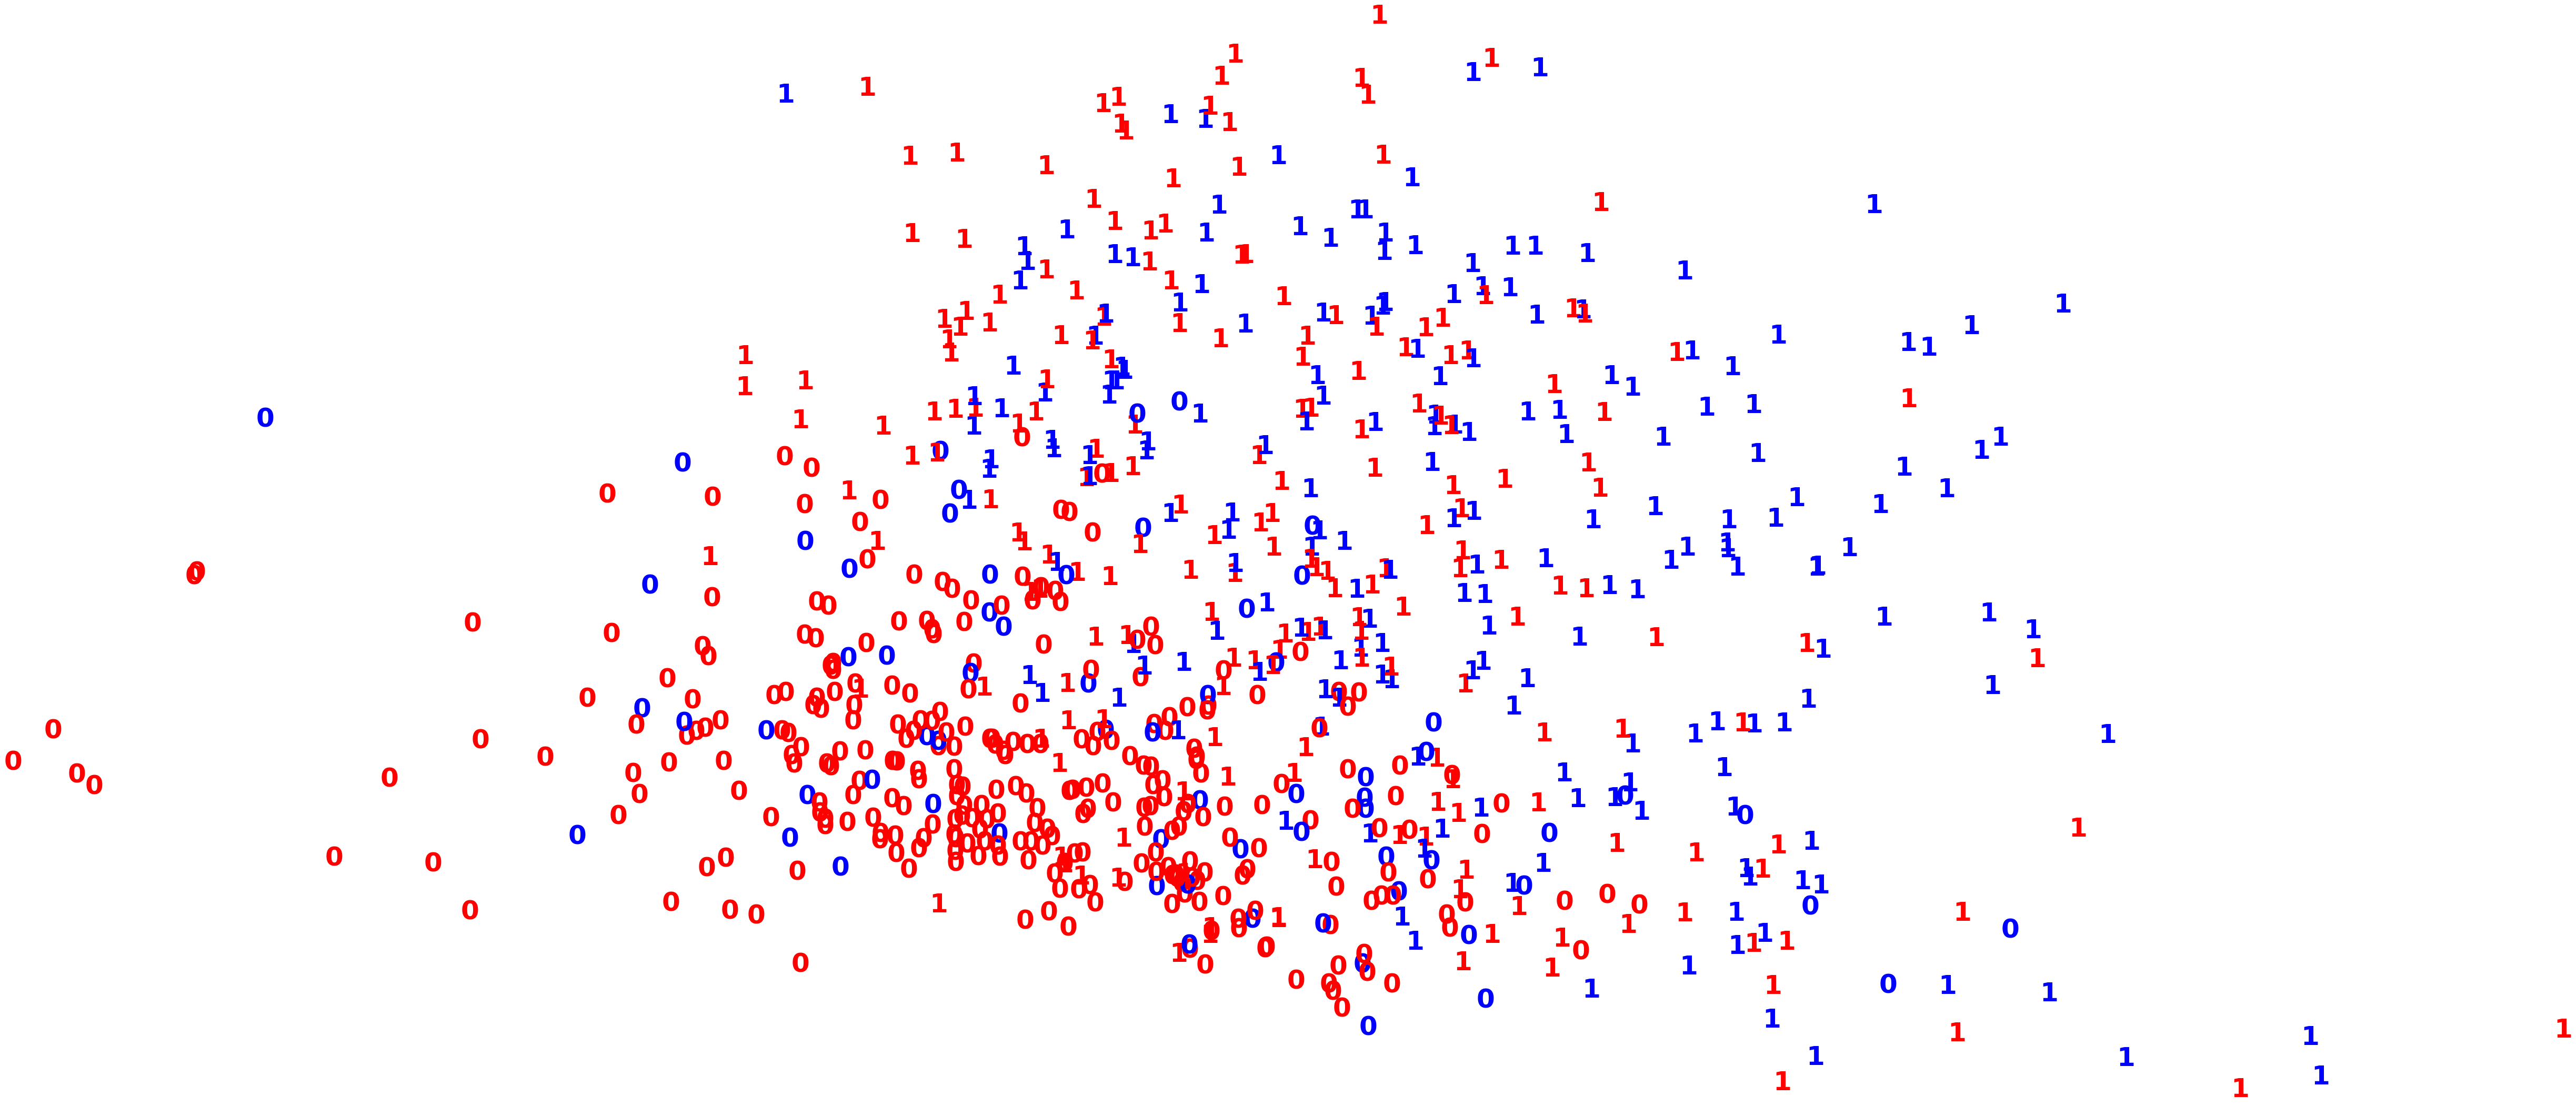

In [56]:
gmm_cluster = GaussianMixture(n_components=2)
clusters = gmm_cluster.fit_predict(x_std)
pca = PCA(n_components=2).fit_transform(x_std)
y_prediction = gmm_cluster.fit_predict(x_std)

plt.figure(figsize=(8,6))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [57]:
silhouette = metrics.silhouette_score(x_std, y_prediction, random_state=42)
ari_value = metrics.adjusted_rand_score(y, y_prediction)
print(f"Silhouette score of GMM    : {silhouette:.3f}")
print(f"Adjusted Rand score of GMM : {ari_value:.3f}\n")

print("Remember that for k-means model,")
print(f"Silhouette score    : 0.157")
print(f"Adjusted Rand score : 0.102")

print(f"\nFor 'Hierarchical Agglomerative Clustering' model:")
print(f"Silhouette score    : 0.139")
print(f"Adjusted Rand score : 0.146")

Silhouette score of GMM    : 0.153
Adjusted Rand score of GMM : 0.071

Remember that for k-means model,
Silhouette score    : 0.157
Adjusted Rand score : 0.102

For 'Hierarchical Agglomerative Clustering' model:
Silhouette score    : 0.139
Adjusted Rand score : 0.146


Yorum: En yüksek Adjusted Rand indeksi, Hierarchical Agglomerative Clustering model'nde gözlemlenmiştir.



## scikit-learn ile GMM uygulanırken kullanılan parametrelerden biri de covariance_type'dir. Bu parametre, kullanılacak kovaryans parametrelerinin türünü belirler. Özellikle, belirtebileceğiniz dört tür vardır:

    full: Bu varsayılandır. Her bileşenin kendi genel kovaryans matrisi vardır.
    tied: Tüm bileşenler aynı genel kovaryans matrisini paylaşır.
    diag: Her bir bileşenin kendi çapraz kovaryans matrisi vardır.
    spherical: Her bir bileşenin kendine ait tek bir varyansı vardır.
Bunları deneyin. Hangisi ARI ve siluet skorları açısından daha iyi performans gösteriyor?

In [58]:
# silhouette & adjusted rand score of the model with various covariance types
df_scores = pd.DataFrame(columns=["Covariance Type", 
                                  "Silhouette Score", 
                                  "Adj. Rand Score"])
pd.options.display.float_format = '{:.4f}'.format

covariance_types = ["full", "tied", "diag", "spherical"]
for cov in covariance_types:
    y_prediction = gmm_cluster.fit_predict(x_std)
    silhouette = metrics.silhouette_score(x_std, y_prediction, 
                                          random_state=42)
    ari_value = metrics.adjusted_rand_score(y, y_prediction)
    df_scores = df_scores.append({"Covariance Type":cov, 
                                  "Silhouette Score":silhouette, 
                                  "Adj. Rand Score":ari_value}, 
                                 ignore_index=True)
df_scores

,Covariance Type,Silhouette Score,Adj. Rand Score
0,full,0.1653,0.0126
1,tied,0.1653,0.0126
2,diag,0.1653,0.0126
3,spherical,0.1528,0.0721


Adjusted Rand indeksi, kovaryans parametresinin "spherical" olduğu modelde maksimum değerdedir. Bu parametrede, her bir bileşenin kendine ait tek bir varyansı vardır.

